In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing train Data

In [2]:
loan= pd.read_csv(r"C:\Users\paryn\Downloads\train_ctrUa4K.csv")

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.shape

(614, 13)

# Exploratory Data Analysis


In [5]:
loan.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [6]:
loan.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

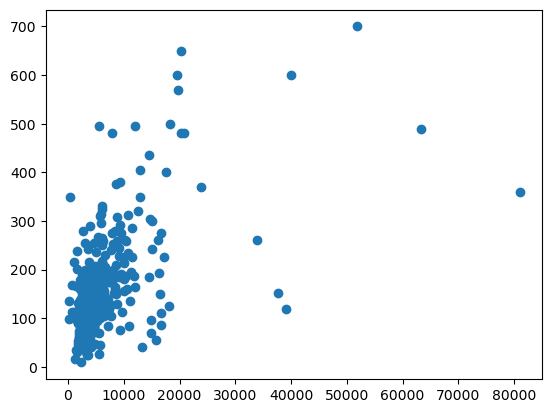

In [9]:
plt.scatter(loan['ApplicantIncome'],loan['LoanAmount'])

In [10]:
# Loan amount increases with Applicant Income

<Axes: xlabel='Dependents'>

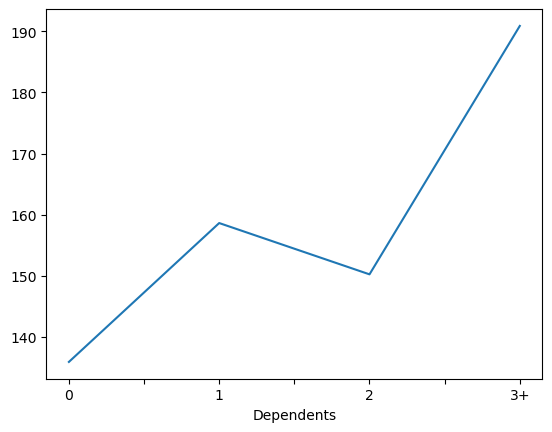

In [11]:
loan.groupby('Dependents')['LoanAmount'].mean().plot()
#Checking if there is any relation between Dependents number and Loan Amount

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

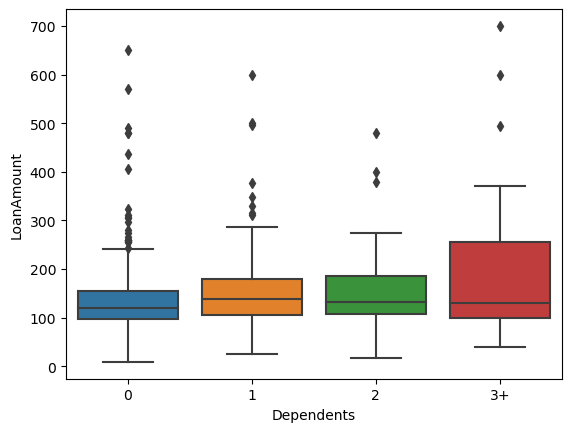

In [12]:
sns.boxplot(x='Dependents',y='LoanAmount',data=loan)

In [13]:
#Loan amount has a role on number of dependents

C:\Users\paryn\AppData\Local\Temp\ipykernel_30580\523120098.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan.corr(),cmap='YlGnBu')


<Axes: >

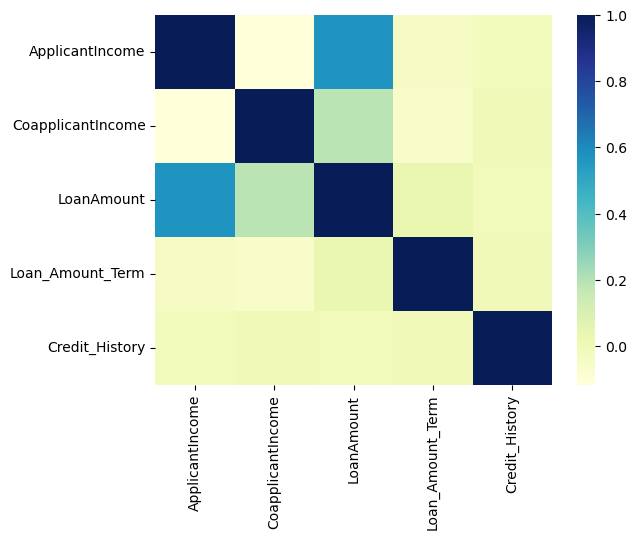

In [14]:
sns.heatmap(loan.corr(),cmap='YlGnBu')

In [15]:
#There is a high correlation between Loan amount and Applicant Income

<Axes: xlabel='Education', ylabel='count'>

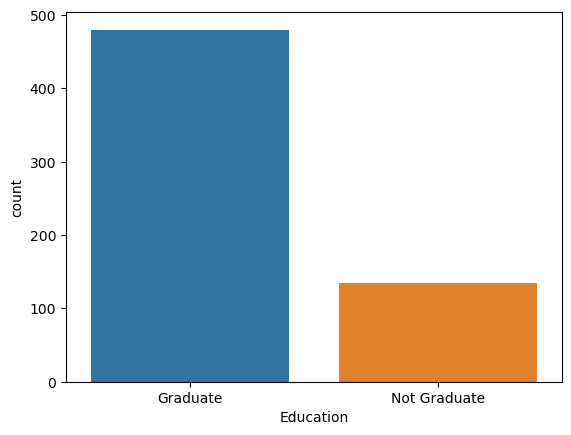

In [16]:
sns.countplot(x=loan.Education)

In [17]:
#Graduates apply for loan more than those who haven't graduated

<Axes: xlabel='Self_Employed', ylabel='count'>

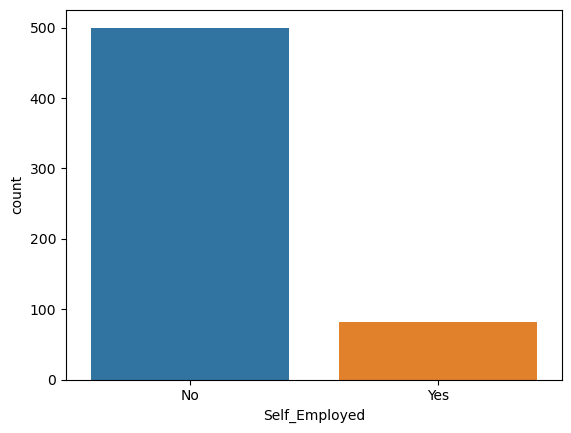

In [18]:
sns.countplot(x=loan.Self_Employed)

In [19]:
#Self employed people apply less for loan

<Axes: xlabel='Married', ylabel='count'>

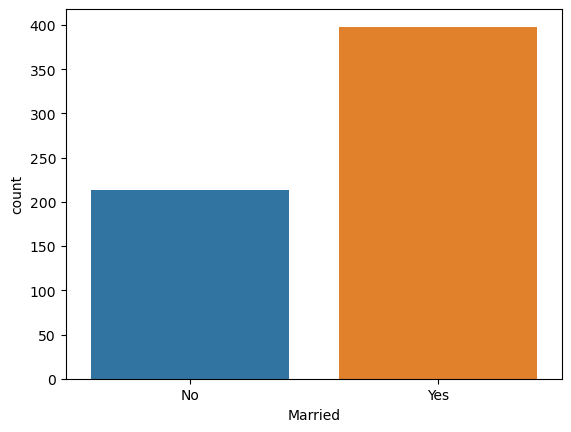

In [20]:
sns.countplot(x=loan.Married)

<Axes: xlabel='Dependents', ylabel='count'>

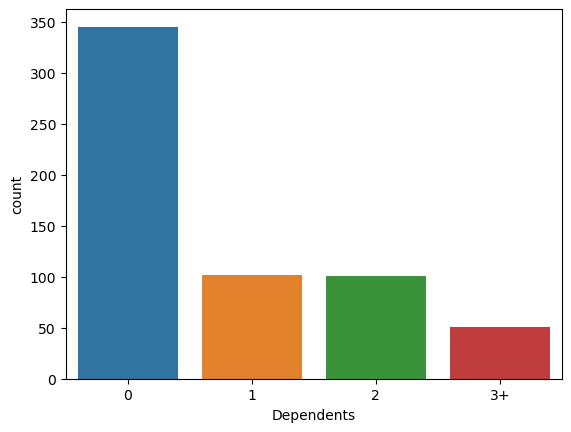

In [21]:
sns.countplot(x=loan.Dependents)

In [22]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
loan1=loan.copy()
loan1['Loan_Status']=loan1['Loan_Status'].apply(lambda x:0 if x=='N' else 1)

C:\Users\paryn\AppData\Local\Temp\ipykernel_30580\4012329030.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan1.corr(),cmap='YlGnBu',annot=True)


<Axes: >

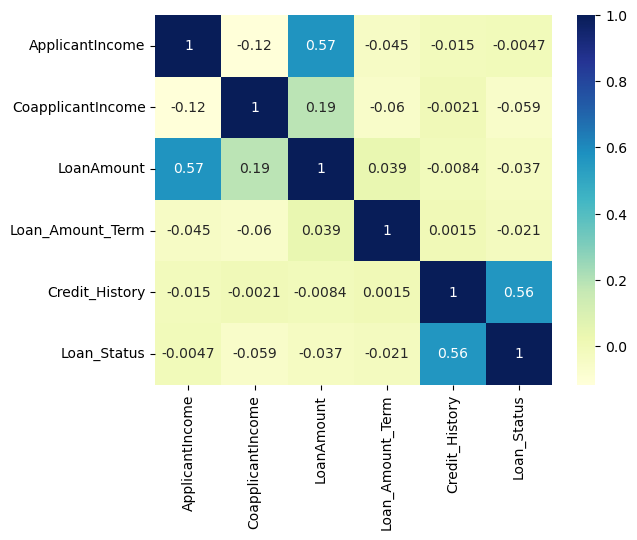

In [24]:
sns.heatmap(loan1.corr(),cmap='YlGnBu',annot=True)

In [120]:
#There is a strong correlation between Credit History and Loan status

# Pre-processing

In [25]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
catg= [x for x in loan.columns if loan[x].dtypes=='O']

In [27]:
catg

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [28]:
num= [x for x in loan.columns if loan[x].dtypes!='O']

In [29]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [30]:
for i in ['Gender','Married','Dependents','Self_Employed','Credit_History']:
    loan[i]=loan[i].fillna(loan[i].mode()[0])

In [31]:
loan.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

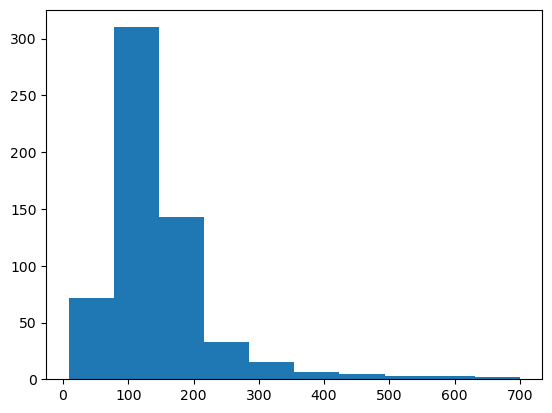

In [32]:
plt.hist(loan['LoanAmount'])


(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <BarContainer object of 10 artists>)

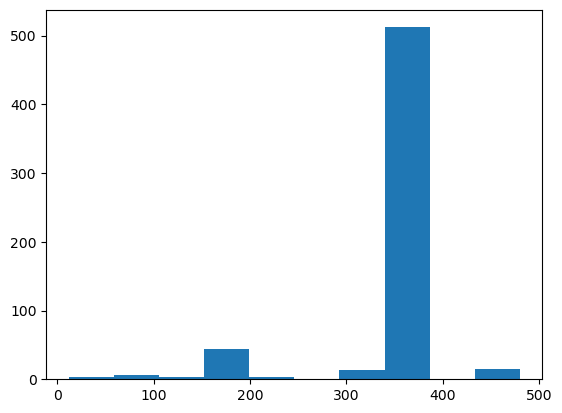

In [33]:
plt.hist(loan['Loan_Amount_Term'])

In [34]:
for i in ['LoanAmount','Loan_Amount_Term']:
    loan[i]=loan[i].fillna(loan[i].median())

In [35]:
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

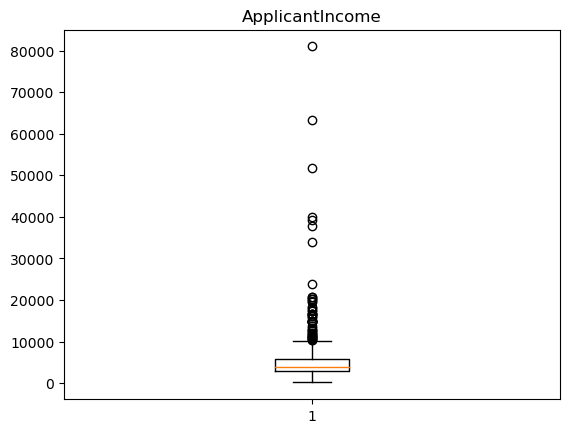

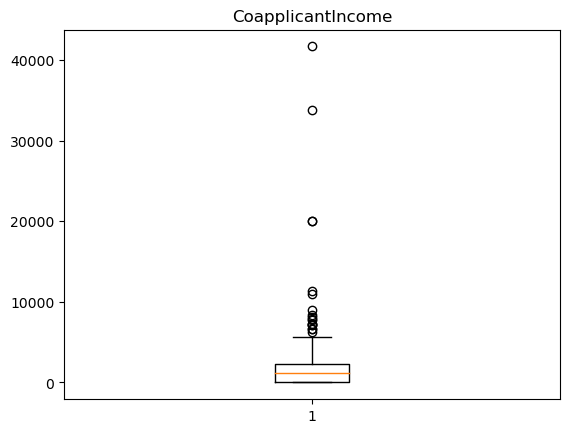

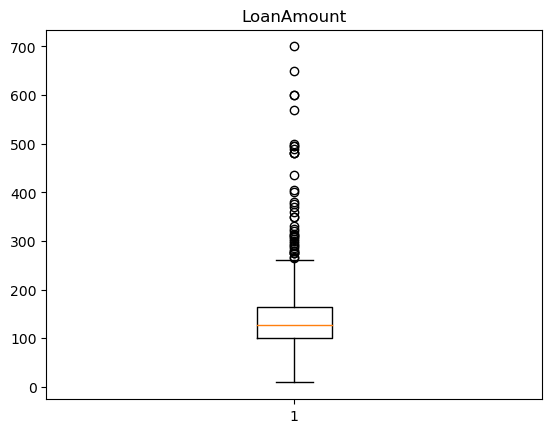

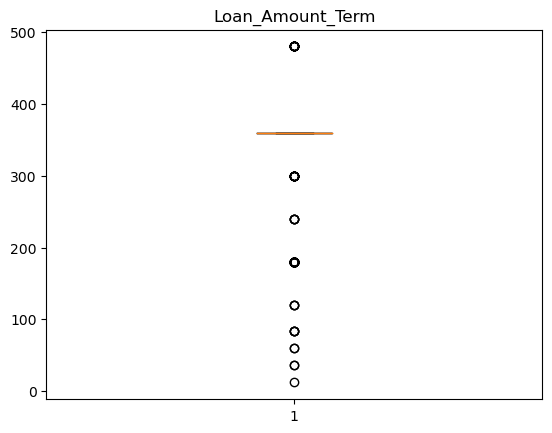

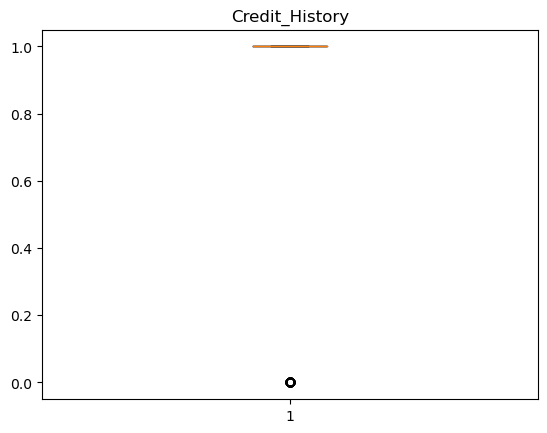

In [36]:
for i in num:
    plt.boxplot(loan[i])
    plt.title(i)
    plt.show()

In [38]:
loan['Loan_Status']=loan['Loan_Status'].apply(lambda x:0 if x=='N' else 1)
loan['Married']=loan['Married'].apply(lambda x:0 if x=='No' else 1)
loan['Self_Employed']=loan['Self_Employed'].apply(lambda x:0 if x=='No' else 1)

In [39]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,Graduate,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,Graduate,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,1,3+,Graduate,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,1,1,Graduate,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,1,2,Graduate,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [40]:
loan= loan.drop('Loan_ID',axis=1)

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
loan['Education']=le.fit_transform(loan['Education'])
loan['Property_Area']=le.fit_transform(loan['Property_Area'])
loan['Dependents']=le.fit_transform(loan['Dependents'])
loan['Gender']=le.fit_transform(loan['Gender'])

In [42]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [43]:
x=loan.drop('Loan_Status',axis=1)
y=loan['Loan_Status']

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# Modelling


Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypredlr=lr.predict(xtest)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy=",accuracy_score(ytest,ypredlr))
print("Precision=",precision_score(ytest,ypredlr))
print("recall_score=",recall_score(ytest,ypredlr))
print("f1_score=",f1_score(ytest,ypredlr))

Accuracy= 0.7886178861788617
Precision= 0.7596153846153846
recall_score= 0.9875
f1_score= 0.8586956521739131


In [47]:
confusion_matrix(ytest,ypredlr)

array([[18, 25],
       [ 1, 79]], dtype=int64)

# K-NN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(2,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(xtrain,ytrain)
    y_pred_knn = classifier.predict(xtest)
    acc = accuracy_score(ytest,y_pred_knn)
    metric.append(acc)

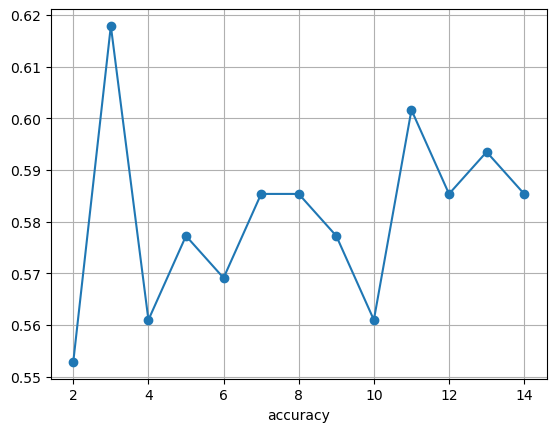

In [49]:
plt.plot(neighbors,metric,"o-")
plt.xlabel("kvalue")
plt.xlabel("accuracy")
plt.grid()

In [50]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski',p=2)
classifier.fit(xtrain,ytrain)
y_pred_knn = classifier.predict(xtest)

In [51]:
print("Accuracy=",accuracy_score(ytest,y_pred_knn))
print("Precision=",precision_score(ytest,y_pred_knn))
print("recall_score=",recall_score(ytest,y_pred_knn))
print("f1_score=",f1_score(ytest,y_pred_knn))

Accuracy= 0.6178861788617886
Precision= 0.6633663366336634
recall_score= 0.8375
f1_score= 0.7403314917127072


In [52]:
confusion_matrix(ytest,y_pred_knn)

array([[ 9, 34],
       [13, 67]], dtype=int64)

SVM

In [53]:
from sklearn.svm import SVC
svmclf=SVC(kernel="linear")
svmclf.fit(xtrain,ytrain)

SVC(kernel='linear')

In [54]:
ypredsvm=svmclf.predict(xtest)
print("Accuracy is:",accuracy_score(ytest,ypredsvm))
print("f1_score=",f1_score(ytest,ypredsvm))

Accuracy is: 0.7967479674796748
f1_score= 0.8648648648648648


In [55]:
print(confusion_matrix(ytest,ypredsvm))

[[18 25]
 [ 0 80]]


Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(xtrain,ytrain)
ypreddt=dt_clf.predict(xtest)

In [57]:
print('Accuracy is:',accuracy_score(ytest,ypreddt))
print("f1_score=",f1_score(ytest,ypreddt))

Accuracy is: 0.6910569105691057
f1_score= 0.7654320987654322


In [58]:
print(confusion_matrix(ytest,ypreddt))

[[23 20]
 [18 62]]


Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(xtrain,ytrain)


RandomForestClassifier()

In [60]:
ypredrf=rf_clf.predict(xtest)
print('Accuracy:',accuracy_score(ytest,ypredrf))
print("f1_score=",f1_score(ytest,ypredrf))

Accuracy: 0.7723577235772358
f1_score= 0.8461538461538461


In [61]:
print(confusion_matrix(ytest,ypredrf))

[[18 25]
 [ 3 77]]


# Fine tuning


In [62]:
model = RandomForestClassifier(n_estimators=300,criterion='entropy',max_features='sqrt',
                               min_samples_leaf=10, random_state=100).fit(xtrain,ytrain)

In [63]:
pred2=model.predict(xtest)

In [64]:
print(confusion_matrix(ytest,pred2))
print(accuracy_score(ytest,pred2))


[[18 25]
 [ 1 79]]
0.7886178861788617


In [65]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features= ['auto', 'sqrt', 'log2']
max_depth=  [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

In [66]:
random_grid= {'n_estimators':n_estimators, 'max_features':max_features, 'max_depth':max_depth,
              'min_samples_split': min_samples_split, 'min_samples_leaf':min_samples_leaf,
              'criterion':['entropy','gini','log_loss']}
rf= RandomForestClassifier()

In [67]:
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,
                                 cv=3, verbose=2, random_state=100, n_jobs=1)
rf_randomcv.fit(xtrain,ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=log_loss, max_depth=340, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=1600; total time=   3.0s
[CV] END criterion=log_loss, max_depth=340, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=1600; total time=   3.1s
[CV] END criterion=log_loss, max_depth=340, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=1600; total time=   2.9s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=2000; total time=   3.8s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=2000; total time=   4.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=2000; total time=   3.8s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   4.3s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   4.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   4.1s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=780, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.9s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=780, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=780, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END criterion=log_loss, max_depth=780, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END criterion=log_loss, max_depth=780, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END criterion=log_loss, max_depth=780, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END criterion=log_loss, max_depth=340, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END criterion=log_loss, max_depth=340, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END criterion=log_loss, max_depth=340, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] 

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   2.9s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   2.8s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   2.8s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.8s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   3.0s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.6s
[CV] END criterion=log_loss, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1400; total time=   2.4s
[CV] END criterion=log_loss, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1400; total time=   2.4s
[CV] END criterion=log_loss, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1400; total time=   2.4s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=230, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   2.9s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=230, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   3.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=230, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   2.9s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   1.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   1.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   1.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END criterion=log_loss, max_depth=1000, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END criterion=log_loss, max_depth=1000, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END criterion=log_loss, max_depth=1000, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   3.1s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   3.1s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   3.0s
[CV] END criterion=

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=800; total time=   1.4s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=800; total time=   1.4s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   3.4s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   3.4s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   3.4s
[CV] END criterion=log_loss, max_depth=560, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END criterion=log_loss, max_depth=560, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END criterion=log_loss, max_depth=560, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END crite

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.7s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.4s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.7s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   4.1s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.9s
[CV] END criterion=gini, max_depth=1000, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   2.3s
[CV] END criterion=gini, max_depth=1000, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   2.3s
[CV] END criterion=gini, max_depth=1000, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   2.3s
[CV] END criterion=gini

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=780, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=1400; total time=   2.8s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=780, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=1400; total time=   2.6s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=780, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=1400; total time=   2.6s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   3.8s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   3.9s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   3.5s
[CV] END criterion=entropy, max_depth=780, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=800; total time=   1.3s
[CV] END criterion=entropy, max_depth=780, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=800; total time=   1.3s
[CV] END criterion=entropy, max_depth=780, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=800; total time=   1.3s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=450, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1400; total time=   2.5s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=450, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1400; total time=   2.5s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=450, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1400; total time=   2.5s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=780, max_features=auto, min_samples_leaf=6, min_samples_split=14, n_estimators=1000; total time=   1.8s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=780, max_features=auto, min_samples_leaf=6, min_samples_split=14, n_estimators=1000; total time=   1.7s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=780, max_features=auto, min_samples_leaf=6, min_samples_split=14, n_estimators=1000; total time=   1.8s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=450, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   1.1s
[CV] END criterion=entropy, max_depth=450, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   1.1s
[CV] END criterion=entropy, max_depth=450, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   1.1s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=1600; total time=   3.1s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=1600; total time=   2.9s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=1600; total time=   2.9s
[CV] END criterion=entropy, max_depth=670, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   3.7s
[CV] END criterion=entropy, max_depth=670, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   3.9s
[CV] END criterion=entropy, max_depth=670, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   3.7s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   2.9s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   3.4s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   3.2s
[CV] END cri

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=450, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   3.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=450, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   2.9s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=450, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   2.6s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=2, min_samples_split=14, n_estimators=1000; total time=   1.7s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=2, min_samples_split=14, n_estimators=1000; total time=   2.0s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=2, min_samples_split=14, n_estimators=1000; total time=   1.8s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   3.5s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   3.4s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   3.5s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=400; total time=   0.7s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=400; total time=   0.7s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END criterion=log_loss, max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=log_loss, max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=log_loss, max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=340, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   4.0s
[CV] END criterion=gini, max_depth=340, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   4.0s
[CV] END criterion=gini, max_depth=340, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   3.8s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=230, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=230, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=230, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.6s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.5s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.5s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   1.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   1.1s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END criterion=log_loss, max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=log_loss, max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=log_loss, max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   3.9s
[CV] END criterion=entropy, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   3.9s
[CV] END criterion=entropy, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   3.8s
[CV] END 

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   3.5s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   3.3s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   3.2s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   2.9s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   3.2s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   3.2s
[CV] END criterion=log_loss, max_depth=670, max_features=log2, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   4.3s
[CV] END criterion=log_loss, max_depth=670, max_features=log2, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   4.5s
[CV] END criterion=log_loss, max_depth=670, max_features=log2, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   4.0s
[CV

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.1s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.9s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.2s
[CV] END criterion=log_loss, max_depth=340, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END criterion=log_loss, max_depth=340, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END criterion=log_loss, max_depth=340, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=1600; total time=   2.7s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=1600; total time=   2.7s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=1600; total time=   2.8s
[CV] END cri

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   1.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   1.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   2.5s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   2.5s
[CV] END criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   2.5s
[CV] END criterion=entropy, max_depth=890, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=890, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=890, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=g

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=340, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   3.6s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=340, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   3.4s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=340, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   4.0s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   3.7s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   3.5s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   3.5s
[CV] END criterion=log_loss, max_depth=450, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=log_loss, max_depth=450, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=log_loss, max_depth=450, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1800; total time=   3.5s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1800; total time=   3.4s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1800; total time=   3.5s
[CV] END criterion=gini, max_depth=230, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END criterion=gini, max_depth=230, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END criterion=gini, max_depth=230, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END criterion=gini, max_

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   4.1s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   3.6s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   3.4s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=1000; total time=   1.8s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=1000; total time=   1.8s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=1000; total time=   1.8s
[CV] END criterion=log_loss, max_depth=1000, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END criterion=log_loss, max_depth=1000, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END criterion=log_loss, max_depth=1000, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END criterion=log_loss, max_depth=560, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=log_loss, max_depth=560, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=log_loss, max_depth=560, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=560, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=1800; total time=   3.1s
[CV] END criterion=entropy, max_depth=560, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=1800; total time=   3.1s
[CV] END criterion=entropy, max_depth=560, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=1800; total time=   3.2s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=450, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.8s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=450, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.8s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=450, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=1800; total time=   3.1s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=1800; total time=   3.1s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=1800; total time=   3.2s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=14, n_estimators=2000; total time=   3.5s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=14, n_estimators=2000; total time=   4.2s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=14, n_estimators=2000; total time=   3.9s
[CV] END criterion=entropy, max_depth=1000, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=2000; total time=   3.8s
[CV] END criterion=entropy, max_depth=1000, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=2000; total time=   3.6s
[CV] END criterion=entropy, max_depth=1000, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=2000; total time=   3.7s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.8s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.6s
[CV] END

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   3.9s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   3.7s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   4.4s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.9s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.7s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END criterion=entropy, max_depth=340, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1600; total time=   3.2s
[CV] END criterion=entropy, max_depth=340, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1600; total time=   3.1s
[CV] END criterion=entropy, max_depth=340, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1600; total time=   2.8s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   3.7s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   3.7s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   3.6s
[CV] END criteri

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   3.1s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   3.1s


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   2.9s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [68]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [69]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=2,
                       n_estimators=200)

In [70]:
best= rf_randomcv.best_estimator_

In [71]:
pred3= best.predict(xtest)

print(confusion_matrix(ytest,pred3))
print(accuracy_score(ytest,pred3))


[[18 25]
 [ 2 78]]
0.7804878048780488


# Test file Preprocessing

In [72]:
test = pd.read_csv(r"C:\Users\paryn\Downloads\test_lAUu6dG.csv")

In [73]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [74]:
test.shape

(367, 12)

In [75]:
test=test.drop('Loan_ID',axis=1)

In [76]:
test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [77]:
for i in ['Gender','Dependents','Self_Employed','Credit_History']:
    test[i]=test[i].fillna(test[i].mode()[0])

In [78]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

(array([ 46., 160., 100.,  37.,   8.,   6.,   2.,   1.,   1.,   1.]),
 array([ 28. ,  80.2, 132.4, 184.6, 236.8, 289. , 341.2, 393.4, 445.6,
        497.8, 550. ]),
 <BarContainer object of 10 artists>)

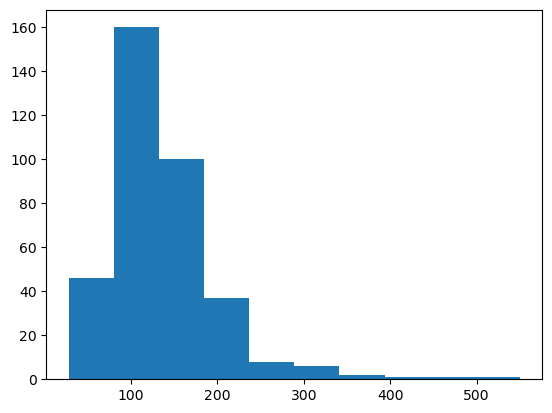

In [79]:
plt.hist(test['LoanAmount'])

(array([  3.,   4.,   1.,  22.,   4.,   0.,   7., 312.,   0.,   8.]),
 array([  6. ,  53.4, 100.8, 148.2, 195.6, 243. , 290.4, 337.8, 385.2,
        432.6, 480. ]),
 <BarContainer object of 10 artists>)

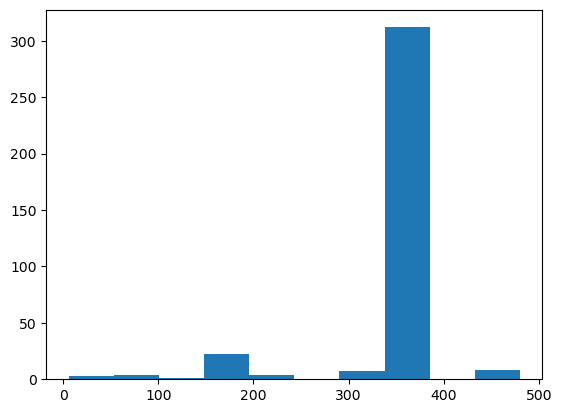

In [80]:
plt.hist(test['Loan_Amount_Term'])

In [81]:
for i in ['LoanAmount','Loan_Amount_Term']:
    test[i]=test[i].fillna(test[i].median())

In [82]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

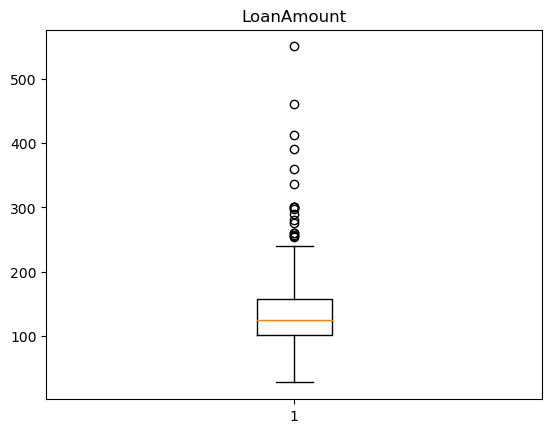

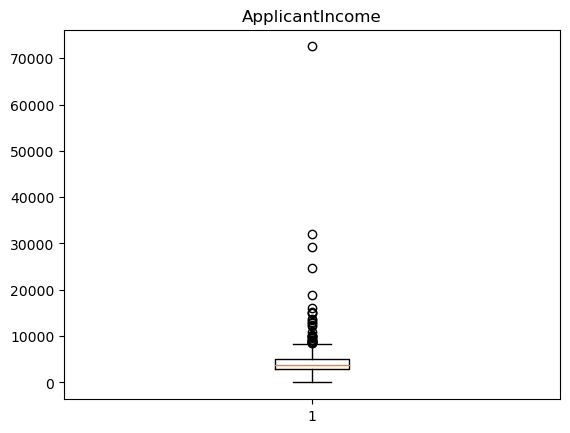

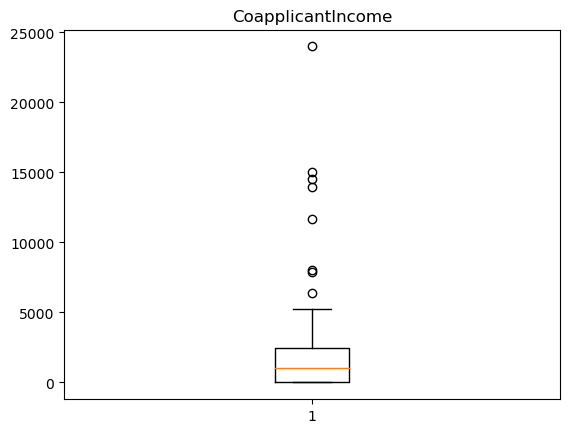

In [83]:
for i in ['LoanAmount','ApplicantIncome','CoapplicantIncome']:
    plt.boxplot(test[i])
    plt.title(i)
    plt.show()

In [84]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [85]:

test['Married']=test['Married'].apply(lambda x:0 if x=='No' else 1)
test['Self_Employed']=test['Self_Employed'].apply(lambda x:0 if x=='No' else 1)

In [86]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,1,0,Graduate,0,5720,0,110.0,360.0,1.0,Urban
1,Male,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,Urban
2,Male,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,Urban
3,Male,1,2,Graduate,0,2340,2546,100.0,360.0,1.0,Urban
4,Male,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,1,3+,Not Graduate,1,4009,1777,113.0,360.0,1.0,Urban
363,Male,1,0,Graduate,0,4158,709,115.0,360.0,1.0,Urban
364,Male,0,0,Graduate,0,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,1,0,Graduate,0,5000,2393,158.0,360.0,1.0,Rural


In [87]:
test['Education']=le.fit_transform(test['Education'])
test['Property_Area']=le.fit_transform(test['Property_Area'])
test['Dependents']=le.fit_transform(test['Dependents'])
test['Gender']=le.fit_transform(test['Gender'])

In [88]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [89]:
ypredlr1=lr.predict(test)

In [90]:
len(ypredlr1)

367

In [91]:
type(ypredlr1)

numpy.ndarray

In [92]:
ypredlr1=pd.DataFrame(ypredlr1,columns=['Loan_Status'])

In [93]:
ypredlr1

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [98]:
sample= pd.read_csv(r"C:\Users\paryn\Downloads\sample_submission_49d68Cx.csv")

In [99]:
sample

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [100]:
sample.update(ypredlr1)

In [101]:
sample['Loan_Status']=sample['Loan_Status'].apply(lambda x:'N' if x=='0' else 'Y')

In [102]:
sample

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [103]:
sample.to_csv(r'C:\Users\paryn\Downloads\Output.csv',index=False)

Fitting test data to SVM model

In [104]:
ypredsvm1=svmclf.predict(test)

In [105]:
ypredsvm1=pd.DataFrame(ypredsvm1,columns=['Loan_Status'])

In [106]:
sample.update(ypredsvm1)

In [107]:
sample

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [108]:
sample['Loan_Status']=sample['Loan_Status'].apply(lambda x:'N' if x=='0' else 'Y')

In [109]:
sample.to_csv(r'C:\Users\paryn\Downloads\Output1.csv',index=False)

Fitting test data to Random Forest Model

In [110]:
ypredrf1=pd.DataFrame(ypredrf1,columns=['Loan_Status'])

In [111]:
sample.update(ypredrf1)

In [112]:
sample

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [113]:
sample['Loan_Status']=sample['Loan_Status'].apply(lambda x:'N' if x=='0' else 'Y')

In [114]:
sample.to_csv(r'C:\Users\paryn\Downloads\Output1.csv',index=False)

Fitting Test data to tuned Random FOrest Model

In [115]:
pred4= best.predict(test)

In [116]:
pred4=pd.DataFrame(pred4,columns=['Loan_Status'])

In [117]:
sample.update(pred4)

In [118]:
sample['Loan_Status']=sample['Loan_Status'].apply(lambda x:'N' if x=='0' else 'Y')

In [119]:
sample.to_csv(r'C:\Users\paryn\Downloads\Output1.csv',index=False)